In [16]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

We have the min and max temperatures in a city In India for each months of the year. We would like to find a function to describe this and show it graphically, the dataset given below. 
 
Task: 
 
1.	fitting it to the periodic function 
 
2.	plot the fit 
 
Data 
 
Max = 39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25 
 
Min = 21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18 


Text(0, 0.5, 'Min-Max temperature')

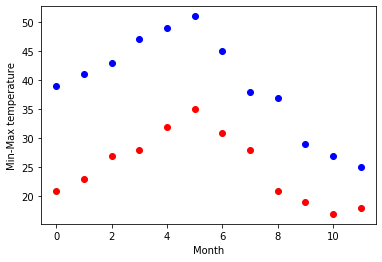

In [8]:
Max_temp = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25])
Min_temp = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18])
month = np.arange(12)
plt.plot(month, Max_temp, 'bo')
plt.plot(month, Min_temp, 'ro')
plt.xlabel('Month')
plt.ylabel('Min-Max temperature')

In [11]:
from scipy import optimize
def yearly_temps(times, avg, ampl, time_offset):
    return (avg
            + ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, month,
                                      Max_temp, [20, 10, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, month,
                                      Min_temp, [-40, 20, 0])

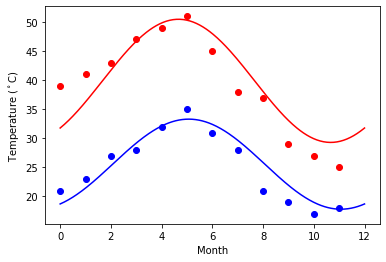

In [12]:
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(month, Max_temp, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(month, Min_temp, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()

data to use: 
 
url=https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv 
 
titanic = pd.read_csv(url) 
 
Charts to plot: 
 
1.	Create a pie chart presenting the male/female proportion 
 
2.	Create a scatterplot with the Fare paid and the Age, differ the plot color by gender 


In [14]:
url="https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv"

In [17]:
titanic = pd.read_csv(url)

In [19]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [42]:
d = (titanic['sex'].value_counts())
label=(titanic['sex'].value_counts().index.values)
d, label

(male      843
 female    466
 Name: sex, dtype: int64, array(['male', 'female'], dtype=object))

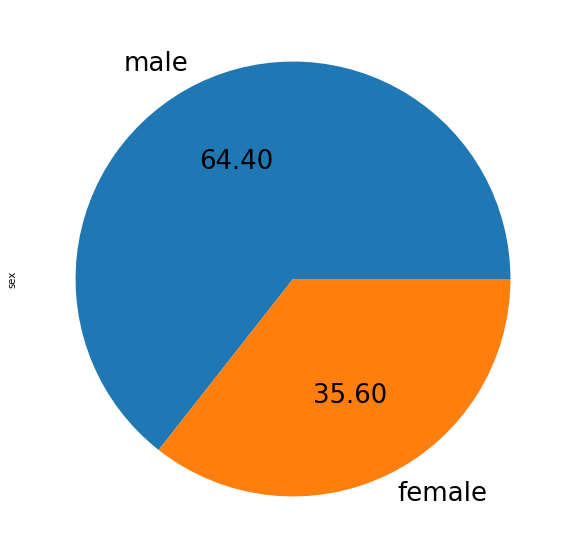

In [44]:
d.plot.pie(figsize = (10,10),fontsize = 26, autopct = '%.2f')

In [51]:
titanic["age"] = titanic["age"].fillna(0)

In [58]:
titanic.replace(to_replace="female",value=0,inplace=True)
titanic.replace(to_replace="male",value=1,inplace=True)

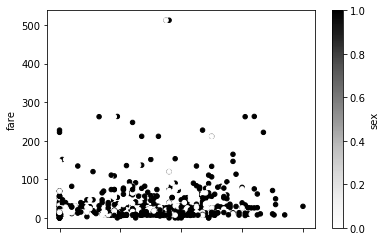

In [59]:
titanic.plot.scatter(x = 'age', y = 'fare',c='sex')